In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
import time

# Importing the dataset
df = pd.read_excel(r'D:\upgrade\workspaces\project\Telco_customer_churn.xlsx')

### Data Exploration 

In [2]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## Note That column "Total charges is object not float type"

In [5]:
# converting the total charges col data types  to float 64
# coerce an algorthm to handle the error you face  convert any missing value to null 


ds = df
#pd.astype(ds['Total Charges'],float)     
ds['Total Charges']=pd.to_numeric(ds['Total Charges'],errors = 'coerce')


In [6]:
df['Total Charges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Total Charges, dtype: float64

## checking the unique values and its counts

In [7]:
def ds_summary(data):
    for col in data.columns :
        print('the name of columns : ', col)
        print('the number of unique : ',data[col].nunique())
        print('unique values : ',data[col].unique())
        print('the number of value counts : ', data[col].count())
        print('the number of null values : ',data[col].isnull().sum())
        print('**************************')
        

In [8]:
ds_summary(df)

the name of columns :  CustomerID
the number of unique :  7043
unique values :  ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
the number of value counts :  7043
the number of null values :  0
**************************
the name of columns :  Count
the number of unique :  1
unique values :  [1]
the number of value counts :  7043
the number of null values :  0
**************************
the name of columns :  Country
the number of unique :  1
unique values :  ['United States']
the number of value counts :  7043
the number of null values :  0
**************************
the name of columns :  State
the number of unique :  1
unique values :  ['California']
the number of value counts :  7043
the number of null values :  0
**************************
the name of columns :  City
the number of unique :  1129
unique values :  ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
the number of value counts :  7043
the n

In [9]:
print(df.isnull().sum())
print(df.groupby('Churn Label')['CustomerID'].count())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64
Churn Label
No     5174
Yes    1869
Name: CustomerID, dtype: int64


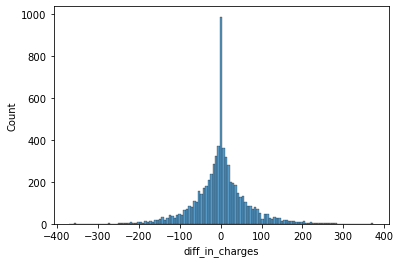

In [10]:
#handling the null values of total charges
ds['calc_charges'] = ds['Monthly Charges'] * ds['Tenure Months']
ds['diff_in_charges'] = ds['Total Charges'] - ds['calc_charges']
ds['Total Charges'] = np.where(ds['Total Charges'].isna() == True,ds['calc_charges'], ds['Total Charges'])
sns.histplot(ds['diff_in_charges'])
ds = ds.drop(['calc_charges','diff_in_charges'], axis=1)


###  check for duplicate customers


In [11]:
# check for duplicate customers
dups = ds[ds.duplicated(subset=['CustomerID'])==True]
print(f'{dups.shape[0]} duplicate CustomerIDs found')

0 duplicate CustomerIDs found


# DATA VISUALIZATION

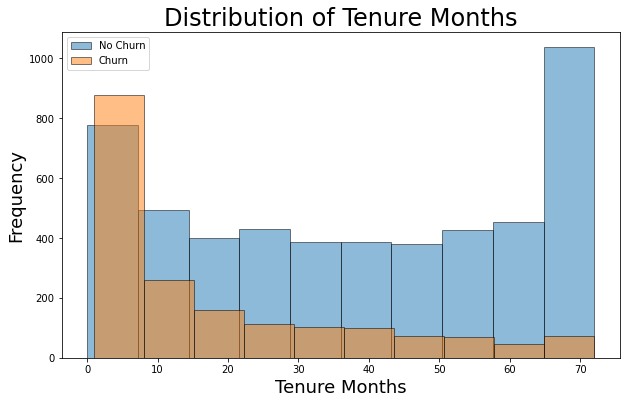

In [12]:
ds[ds['Churn Value'] == 0]['Tenure Months'].plot(kind='hist', color='tab:blue', edgecolor='black', alpha=0.5, figsize=(10,6))
ds[ds['Churn Value'] == 1]['Tenure Months'].plot(kind='hist', color='tab:orange', edgecolor='black', alpha=0.5, figsize=(10,6))
plt.legend(labels=['No Churn', 'Churn'])
plt.title('Distribution of Tenure Months', size=24)
plt.xlabel('Tenure Months', size=18)
plt.ylabel('Frequency', size=18)
plt.tight_layout
plt.show()

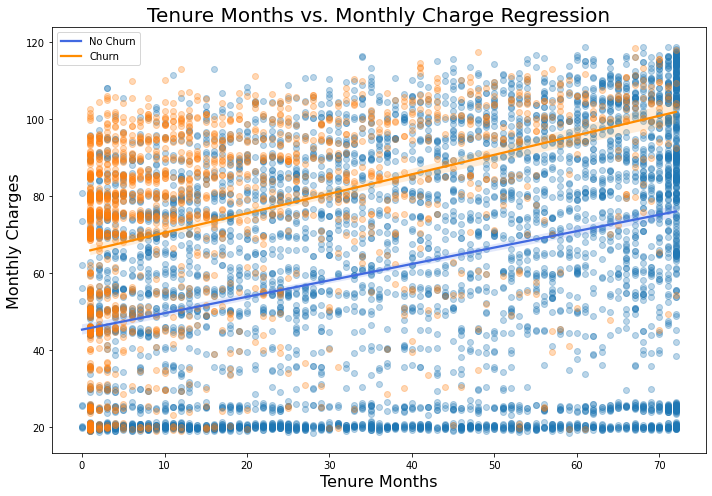

In [13]:
ds_0 = ds[ds['Churn Value'] == 0]
ds_1 = ds[ds['Churn Value'] == 1]

fig = plt.figure(figsize=(10, 7))
sns.regplot(data=ds_0, x='Tenure Months', y='Monthly Charges', 
            scatter_kws = {'color': 'tab:blue', 'alpha' : 0.3}, 
            line_kws={'color' : 'royalblue'}) 
sns.regplot(data=ds_1, x='Tenure Months', y='Monthly Charges', 
            scatter_kws = {'color': 'tab:orange', 'alpha' : 0.3}, 
            line_kws={'color' : 'darkorange'})

# Legend, title and labels.
plt.legend(labels=['No Churn', 'Churn'])
plt.title('Tenure Months vs. Monthly Charge Regression', size=20)
plt.xlabel('Tenure Months', size=16)
plt.ylabel('Monthly Charges', size=16)
plt.tight_layout()
plt.show()

In [14]:
def group_churn_reason(X_df):
    """Creates new column by mapping churn reason to higher level parent on 
    an X features dataframe.

    Parameters:
    X_df (pd.DataFrame)): train or test slice contains predictors

    Returns:
    X_df (pd.DataFrame)): same dataframe with new column
    """
    
    reason_map = {'Attitude of support person' : 'Cust Service',
                  'Attitude of service provider' : 'Cust Service', 
                  'Service dissatisfaction' : 'Cust Service', 
                  'Lack of self-service on Website' : 'Cust Service', 
                  'Poor expertise of phone support'  : 'Cust Service', 
                  'Poor expertise of online support' : 'Cust Service', 
                  'Competitor offered higher download speeds' : 'Product', 
                  'Competitor offered more data' : 'Product', 
                  'Competitor had better devices' : 'Product', 
                  'Network reliability' : 'Product', 
                  'Product dissatisfaction' : 'Product', 
                  'Limited range of services' : 'Product', 
                  'Competitor made better offer' : 'Pricing', 
                  'Price too high' : 'Pricing', 
                  'Extra data charges' : 'Pricing', 
                  'Long distance charges' : 'Pricing', 
                  'Lack of affordable download/upload speed' : 'Pricing', 
                  'Moved' : 'Moved', 
                  'Deceased' : 'Moved',
                  'Don\'t know' : 'Unknown'
                 }

    X_df['churn_rsn_grp'] = X_df['Churn Reason'].map(reason_map)
    return X_df

In [15]:
group_churn_reason(ds)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,churn_rsn_grp
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,Pricing
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,NaN,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Mailed check,84.80,1990.50,No,0,59,2140,NaN,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN,NaN


<AxesSubplot:>

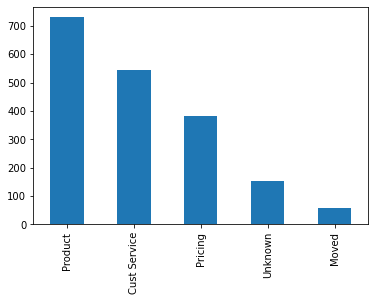

In [16]:
pd.value_counts(ds['churn_rsn_grp']).plot.bar()

<AxesSubplot:xlabel='Gender', ylabel='Total Charges'>

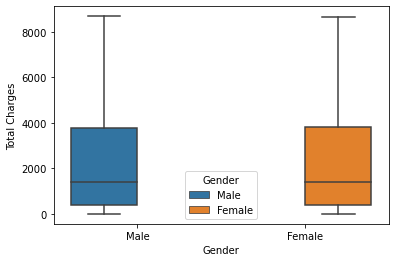

In [17]:
sns.boxplot(data=df, y='Total Charges', x='Gender', hue ='Gender')

Text(0.5, 1.0, 'Telco Data Correlation Heatmap')

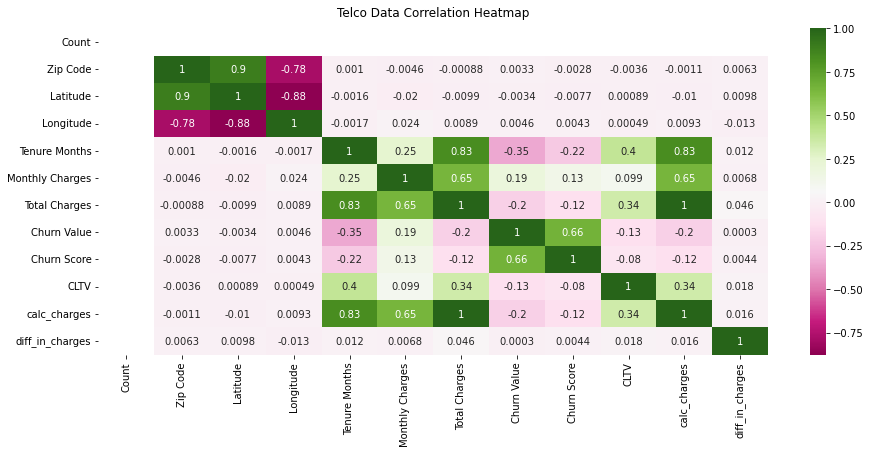

In [18]:
#checking the corrlation of all the attributes with target
plt.figure(figsize=(15, 6))
cmap = "PiYG"
heatmap=sns.heatmap(df.corr(),cmap=cmap, annot=True)
heatmap.set_title('Telco Data Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

The correlation plot procide us many insights as follow:

A  correlation exist between Tenure_months and CLTV
Correaltion exist between monthky charges & Tenure months
Monthly charges also play a role in dictating the churn score of the customer

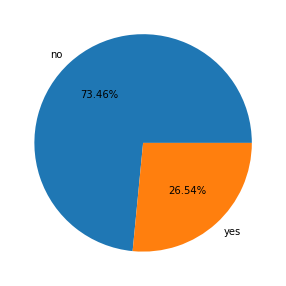

In [19]:
plt.figure(figsize=(10,5))
plt.pie(df['Churn Label'].value_counts(), labels=['no','yes'], autopct='%.2f%%')
plt.show()

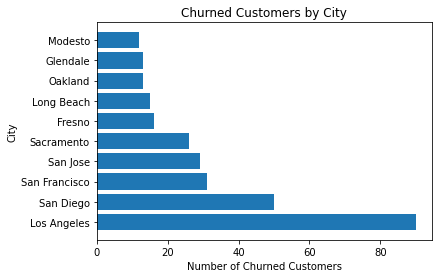

In [20]:
# Filter the dataset by churn_label='Yes' and select the 'State' column
churn_yes_states = df.loc[df['Churn Label'] == 'Yes', 'City']

# Get the value counts of each state
state_counts = churn_yes_states.value_counts().nlargest(10)

# Create a horizontal bar plot
plt.barh(state_counts.index, state_counts.values)

# Set plot title and axis labels
plt.title('Churned Customers by City')
plt.xlabel('Number of Churned Customers')
plt.ylabel('City')

# Display the plot
plt.show()


<AxesSubplot:xlabel='Total Charges'>

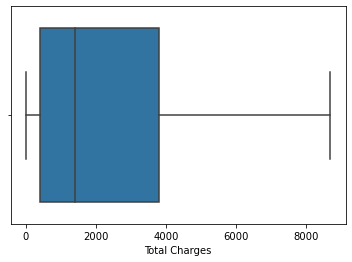

In [21]:
sns.boxplot(x = ds['Total Charges'])

In [22]:
ds['Total Charges'].isnull().sum()

0

# data preparation for the model

In [23]:
droplist = ['CustomerID','Count','Country','State','City','Tenure Months','Monthly Charges','Zip Code','Lat Long','Churn Score','CLTV','Churn Reason','Churn Label','Latitude','Longitude','churn_rsn_grp']
ds.drop(droplist,axis =1 , inplace = True)

In [24]:
ds.head()  , ds.columns

(   Gender Senior Citizen Partner Dependents Phone Service Multiple Lines  \
 0    Male             No      No         No           Yes             No   
 1  Female             No      No        Yes           Yes             No   
 2  Female             No      No        Yes           Yes            Yes   
 3  Female             No     Yes        Yes           Yes            Yes   
 4    Male             No      No        Yes           Yes            Yes   
 
   Internet Service Online Security Online Backup Device Protection  \
 0              DSL             Yes           Yes                No   
 1      Fiber optic              No            No                No   
 2      Fiber optic              No            No               Yes   
 3      Fiber optic              No            No               Yes   
 4      Fiber optic              No           Yes               Yes   
 
   Tech Support Streaming TV Streaming Movies        Contract  \
 0           No           No               

In [25]:
#Label encoding
for col in ds.columns :
    if(col != 'Churn Value' and col != 'Total Charges'):
        ds[col]=ds[col].astype('category')
        ds[col]=ds[col].cat.codes

In [26]:
ds.head(5)
ds_summary(ds)

the name of columns :  Gender
the number of unique :  2
unique values :  [1 0]
the number of value counts :  7043
the number of null values :  0
**************************
the name of columns :  Senior Citizen
the number of unique :  2
unique values :  [0 1]
the number of value counts :  7043
the number of null values :  0
**************************
the name of columns :  Partner
the number of unique :  2
unique values :  [0 1]
the number of value counts :  7043
the number of null values :  0
**************************
the name of columns :  Dependents
the number of unique :  2
unique values :  [0 1]
the number of value counts :  7043
the number of null values :  0
**************************
the name of columns :  Phone Service
the number of unique :  2
unique values :  [1 0]
the number of value counts :  7043
the number of null values :  0
**************************
the name of columns :  Multiple Lines
the number of unique :  3
unique values :  [0 2 1]
the number of value counts :  7

In [27]:
Y = ds['Churn Value']
X = ds.drop('Churn Value' , axis=1)
print(X ,Y)

over = SMOTE(sampling_strategy = 'minority')#balancing data  , get the minority class and increase it 
X,Y = over.fit_resample(X,Y)

      Gender  Senior Citizen  Partner  Dependents  Phone Service  \
0          1               0        0           0              1   
1          0               0        0           1              1   
2          0               0        0           1              1   
3          0               0        1           1              1   
4          1               0        0           1              1   
...      ...             ...      ...         ...            ...   
7038       0               0        0           0              1   
7039       1               0        1           1              1   
7040       0               0        1           1              1   
7041       0               0        1           1              0   
7042       1               0        0           0              1   

      Multiple Lines  Internet Service  Online Security  Online Backup  \
0                  0                 0                2              2   
1                  0               

{'mean_fit_time': array([0.02236004, 0.02759175]), 'std_fit_time': array([0.00266003, 0.0029634 ]), 'mean_score_time': array([0.00440259, 0.00353093]), 'std_score_time': array([0.00059257, 0.00078936]), 'param_penalty': masked_array(data=['l1', 'l2'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_solver': masked_array(data=['liblinear', 'liblinear'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'penalty': 'l1', 'solver': 'liblinear'}, {'penalty': 'l2', 'solver': 'liblinear'}], 'split0_test_score': array([0.80028839, 0.80245133]), 'split1_test_score': array([0.81759193, 0.81687094]), 'split2_test_score': array([0.80894016, 0.80966114]), 'split3_test_score': array([0.78787879, 0.78787879]), 'split4_test_score': array([0.7979798, 0.7979798]), 'mean_test_score': array([0.80253581, 0.8029684 ]), 'std_test_score': array([0.01008304, 0.00990882]), 'rank_test_score': array([2, 1])} {'penalty': 'l2',

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


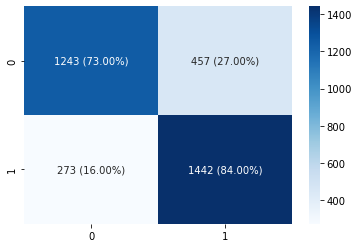

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
LR_model = LogisticRegression(class_weight='balanced' , random_state=42)

### finding best parameters' values using gridSearchCv
solver = ['liblinear']
penalty = ['l1', 'l2']
lr_param = {'solver':solver, 'penalty':penalty}
gsCV = GridSearchCV(LR_model, lr_param, scoring='accuracy', n_jobs=-1, cv=5)#cross validation
lr_result = gsCV.fit(X_train, y_train)
print( lr_result.cv_results_ ,lr_result.best_params_)

### with default parameters
LR_model.fit(X_train,y_train)
y_pr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_pr))
print(classification_report(y_test, y_pr))
c_matrix = confusion_matrix(y_test, y_pr)

########## heatmap 
percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
labels = np.asarray(labels)
sns.heatmap(confusion_matrix(y_test, y_pr), annot=labels,fmt = '',cmap='Blues')
##########

y_test = y_test.reset_index()
y_test.drop(['index'],inplace=True,axis=1)
y_test = pd.DataFrame(y_test)
y_test['predicted churn']= y_pr
print(y_test)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
rf = AdaBoostClassifier(random_state=42)

### finding best parameters' values using gridSearchCv
learning_rate = [0.1, 0.3, 0.5]
n_estimators = [100, 1000]
ab_param = dict(learning_rate=learning_rate, n_estimators=n_estimators)
ab_search = GridSearchCV(rf, ab_param, scoring='accuracy', n_jobs=-1, cv=5)
ab_result = ab_search.fit(X_train, y_train)
print('Best: %f using %s' % (ab_result.best_score_, ab_result.best_params_))
print(ab_result.cv_results_)

### with default parameters
rf.fit(X_train,y_train)
y_pr = rf.predict(X_test)
print(classification_report(y_test, y_pr))
y_test = y_test.reset_index()
y_test.drop(['index'],inplace=True,axis=1)
y_test = pd.DataFrame(y_test)
y_test['predicted churn']= y_pr
print(y_test)

Best: 0.838308 using {'learning_rate': 0.5, 'n_estimators': 1000}
{'mean_fit_time': array([0.87981625, 8.77647638, 0.88208566, 8.54570718, 1.00950189,
       6.0476449 ]), 'std_fit_time': array([0.1080461 , 0.28177151, 0.08485196, 0.25289577, 0.0582945 ,
       0.79629053]), 'mean_score_time': array([0.07125607, 0.52646074, 0.05465612, 0.35637627, 0.07051964,
       0.26382527]), 'std_score_time': array([0.01974595, 0.02220525, 0.00395402, 0.08181922, 0.02058258,
       0.03337516]), 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.3, 0.3, 0.5, 0.5],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[100, 1000, 100, 1000, 100, 1000],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'learning_rate': 0.1, 'n_estimators': 100}, {'learning_rate': 0.1, 'n_estimators': 1000}, {'learning_rate': 0.3, 'n_estimators'

Best: 0.848837 using {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}
{'mean_fit_time': array([ 0.47366052,  3.79454064,  0.74771166,  6.84620357,  1.13719907,
       10.22510324,  0.40678835,  3.7959744 ,  0.76254339,  6.68785958,
        1.05467777,  9.78208475,  0.40838394,  3.77576523,  0.68415647,
        6.75585613,  1.09702697,  8.46705089]), 'std_fit_time': array([0.04070879, 0.14686169, 0.03654315, 0.31283752, 0.01643769,
       0.5535846 , 0.0337074 , 0.18742814, 0.05069958, 0.21175475,
       0.00956889, 0.10109026, 0.02485045, 0.11371662, 0.00144424,
       0.11075979, 0.01314551, 0.1109839 ]), 'mean_score_time': array([0.00680079, 0.03132076, 0.01020336, 0.07163849, 0.01250534,
       0.09277864, 0.00620193, 0.03351336, 0.00960159, 0.06503139,
       0.01230917, 0.10314341, 0.00690446, 0.03561802, 0.01020293,
       0.06523533, 0.01580477, 0.06696973]), 'std_score_time': array([0.00040062, 0.00175456, 0.00098288, 0.00922558, 0.00044646,
       0.00153749, 0.0003

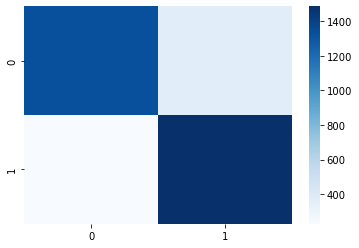

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
rf = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

### finding best parameters' values using gridSearchCv
max_depth = [3, 6, 9]
learning_rate = [0.1, 0.3, 0.5]
n_estimators = [100, 1000]
xgb_param = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators)
xgb_search = GridSearchCV(rf, xgb_param, scoring='accuracy', n_jobs=-1, cv=5)
xgb_result = xgb_search.fit(X_train, y_train)
print('Best: %f using %s' % (xgb_result.best_score_, xgb_result.best_params_))
print(xgb_result.cv_results_)

### with default parameters
rf.fit(X_train,y_train)
y_pr = rf.predict(X_test)
print(classification_report(y_test, y_pr))
sns.heatmap(confusion_matrix(y_test, y_pr), cmap='Blues')
y_test = y_test.reset_index()
y_test.drop(['index'],inplace=True,axis=1)
y_test = pd.DataFrame(y_test)
y_test['predicted churn']= y_pr
print(y_test)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
#Logistic regression 
print(pd.DataFrame({'actual churn':y_test,'predicted churn':gsCV.predict(X_test)}))

#ada boost
print(pd.DataFrame({'actual churn':y_test,'predicted churn':ab_result.predict(X_test)}))

#xgboost
print(pd.DataFrame({'actual churn':y_test,'predicted churn':xgb_result.predict(X_test)}))


       actual churn  predicted churn
9428              1                1
4593              0                0
5379              0                1
8918              1                1
6448              0                0
...             ...              ...
10057             1                1
5405              0                0
308               1                1
1565              1                1
2631              0                0

[3415 rows x 2 columns]
       actual churn  predicted churn
9428              1                1
4593              0                0
5379              0                1
8918              1                1
6448              0                0
...             ...              ...
10057             1                1
5405              0                0
308               1                1
1565              1                1
2631              0                0

[3415 rows x 2 columns]
       actual churn  predicted churn
9428              1      

In [32]:
result = {
        'model used' : ['Logstic Regression','Adaboost','Xgboost'],
        'highest score' : [gsCV.best_score_ , ab_result.best_score_ , xgb_result.best_score_],
        'best hyperparameters' : [gsCV.best_params_ , ab_result.best_params_ , xgb_result.best_params_] 
    }
pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

,model used,highest score,best hyperparameters
0,Logstic Regression,0.802968,"{'penalty': 'l2', 'solver': 'liblinear'}"
1,Adaboost,0.838308,"{'learning_rate': 0.5, 'n_estimators': 1000}"
2,Xgboost,0.848837,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti..."


In [33]:
from sklearn.decomposition import PCA 

pca_model = PCA(n_components=10,svd_solver='auto')
X = pca_model.fit_transform(X)
#print(X.shape , Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [34]:
LR_model = LogisticRegression(class_weight='balanced' , solver = 'liblinear',penalty='l1', random_state=42)
LR_model.fit(X_train,y_train)
y_pr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_pr))

0.7748169838945828


In [35]:
rf = AdaBoostClassifier(random_state=42 , learning_rate= .5,n_estimators = 1000)
rf.fit(X_train,y_train)
y_pr = rf.predict(X_test)
print(accuracy_score(y_test, y_pr))

0.7862371888726208


In [37]:
rf = XGBClassifier(learning_rate= 0.3,max_depth = 6,n_estimators = 100)
rf.fit(X_train,y_train)
y_pr = rf.predict(X_test)
print(accuracy_score(y_test, y_pr))

0.811420204978038


In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
from sklearn.metrics import classification_report

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1700
           1       0.77      0.76      0.77      1715

    accuracy                           0.77      3415
   macro avg       0.77      0.77      0.77      3415
weighted avg       0.77      0.77      0.77      3415



In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
clf2 = KNeighborsClassifier()
clf2.fit(X_train , y_train)
y_pred2=clf2.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1700
           1       0.79      0.78      0.79      1715

    accuracy                           0.79      3415
   macro avg       0.79      0.79      0.79      3415
weighted avg       0.79      0.79      0.79      3415

